# generating ricker wavelet and reflectiviy series 

In [1]:
# make sure run the tutorial file in source directory

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import savemat,loadmat
import os

In [3]:
from ricker_wavelet import *

In [4]:
#defining parameters
frequency = 25
dt = 0.004
length = 0.1 
w,t = ricker_wavelet(frequency, dt, length,np.pi/2)
directory = '..\data'
filename = os.path.join(directory, 'ricker.mat')
savemat(filename, {'w': w})

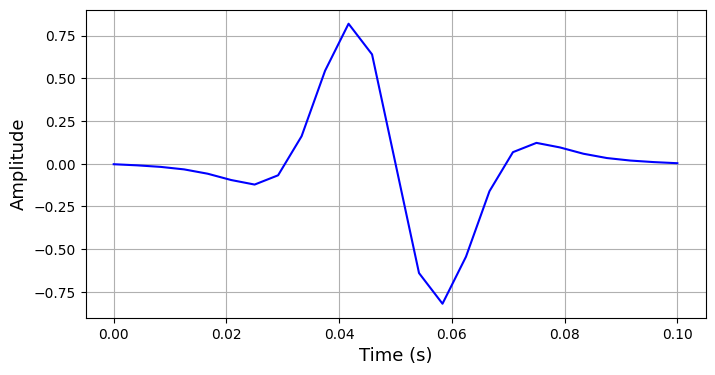

In [5]:
 # plotting the wavelet
plt.figure(figsize=(8, 4))
plt.plot(t, w, color='blue')
# plt.title('Ricker Wavelet')
plt.xlabel('Time (s)',fontsize = 13)
plt.ylabel('Amplitude',fontsize=13)
plt.grid(True)
plt.show()

# reflectivity series  

In [6]:
from random_reflectivity import *

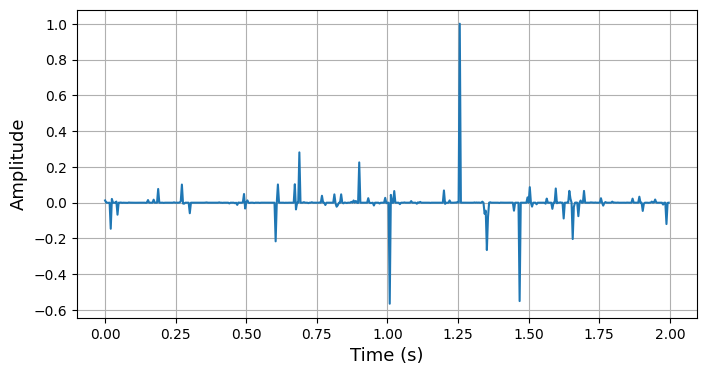

500

In [7]:
time,r=random_reflectivity (20*len(w),0.004)
directory = '..\data'
filename = os.path.join(directory, 'reflectivity.mat')
savemat(filename, {'r': r})
plt.figure(figsize=(8, 4))
plt.plot(time,r)
# plt.title('refelectivity series ')
plt.xlabel('Time (s)',fontsize = 13)
plt.ylabel('Amplitude',fontsize=13)
plt.grid(True)
plt.show()
len(r)#convolution of walelet and reflectivity

# data with or without noise 

In [8]:
from gen_data import *

# read and write the data 

In [9]:
A,B=generate_data(w,r,4)
directory = '../data/noise_free'
filename = os.path.join(directory, 'data.mat')
savemat(filename, {'d': A})

In [10]:
data = loadmat(filename)
d = data['d'].flatten()
directory = '../data/noisy'
filename = os.path.join(directory, 'data_noise.mat')
savemat(filename, {'dnew': B})
data = loadmat(filename)
dnew = data['dnew'].flatten()
dtime=np.arange(0, 0.004 * len(d), 0.004)

<Figure size 640x480 with 0 Axes>

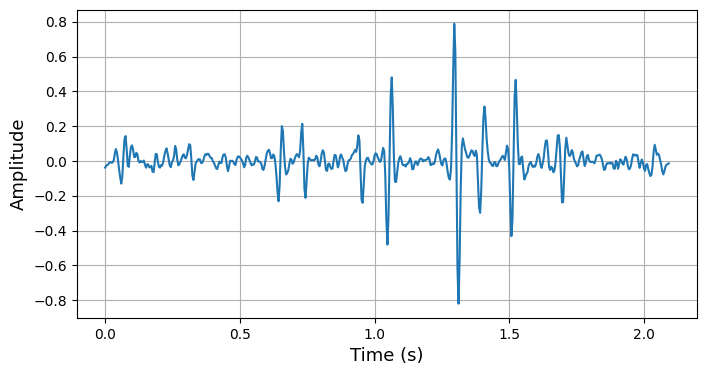

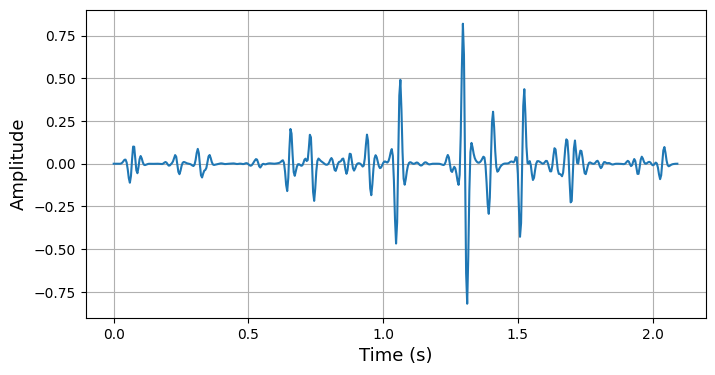

In [11]:
plt.figure(1)
plt.figure(figsize=(8, 4))
plt.grid(True)
# plt.title('data with noise ')
plt.xlabel('Time (s)',fontsize = 13)
plt.ylabel('Amplitude',fontsize=13)
plt.plot(dtime,dnew)
plt.figure(2)
plt.figure(figsize=(8, 4))
plt.grid(True)
# plt.title('data without noise ')
plt.xlabel('Time (s)',fontsize = 13)
plt.ylabel('Amplitude',fontsize=13)
plt.plot(dtime,d)

# toeplitz matrix

In [12]:
from toep import *

In [13]:
p=len(d)
q=len(w)
xo=np.hstack((np.zeros(p-q+1))) #initial guess
A=toep(p,w)

# decon by gradient descent

# solution of without noise data

In [14]:
from grad_des import *
from grad_des_reg import *

In [15]:
x_sol,final_iter=grad_des(A,d,xo,500)

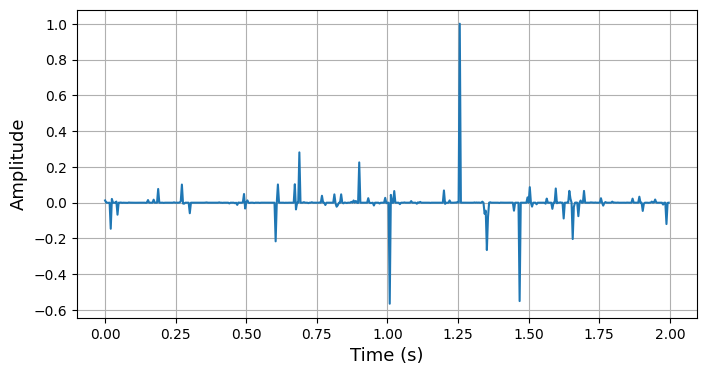

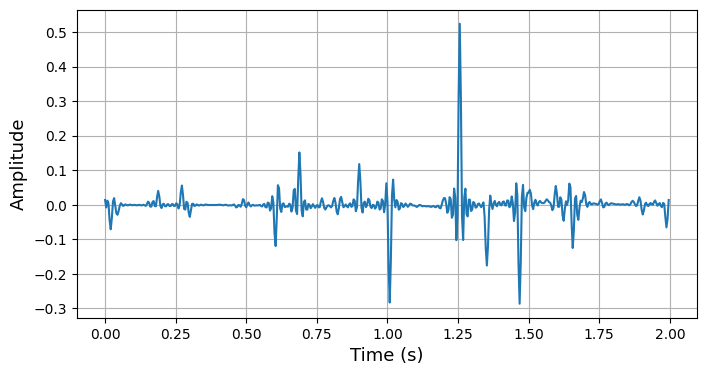

In [16]:
plt.figure(figsize=(8, 4))
plt.plot(time,r)
# plt.title('True refelectivity series')
plt.xlabel('Time (s)',fontsize = 13)
plt.ylabel('Amplitude',fontsize=13)
plt.grid(True)
plt.figure(figsize=(8, 4))
plt.plot(time,x_sol)
# plt.title('Recovered refelectivity series gradient descent')
plt.xlabel('Time (s)',fontsize = 13)
plt.ylabel('Amplitude',fontsize=13)
plt.grid(True)   
directory = '../results/data'
figure_path = os.path.join(directory,'grad_des.png')
plt.savefig(figure_path)    

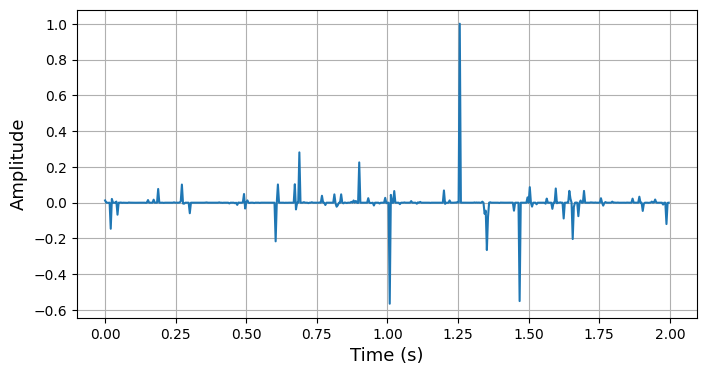

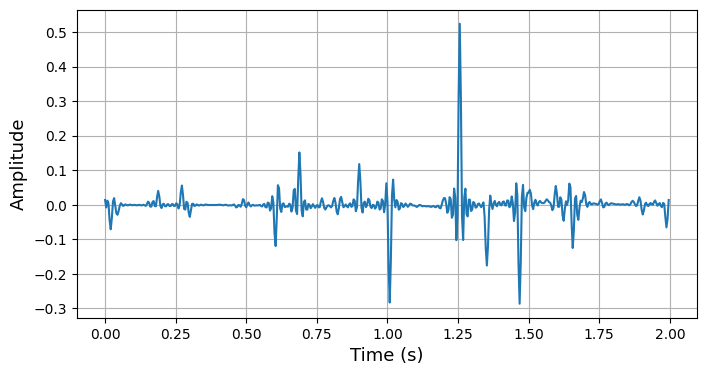

In [17]:
x_sol_reg,final_iter_reg=grad_des_reg(A,d,xo,0.0,500)
plt.figure(figsize=(8, 4))
plt.plot(time,r)
# plt.title('True refelectivity series')
plt.xlabel('Time (s)',fontsize = 13)
plt.ylabel('Amplitude',fontsize=13)
plt.grid(True)
plt.show()
plt.figure(figsize=(8, 4))
plt.plot(time,x_sol_reg)
# plt.title('Recovered refelectivity series with reg')
plt.xlabel('Time (s)',fontsize = 13)
plt.ylabel('Amplitude',fontsize=13)
plt.grid(True)
plt.show()

# solution of noisy data by gradient descent

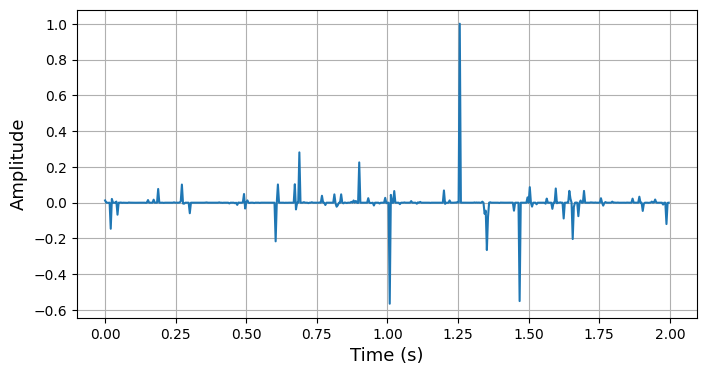

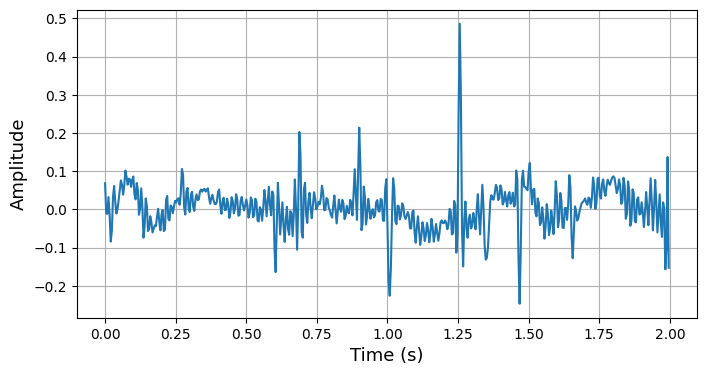

In [18]:
x_sol_noise, final_iter_noise=grad_des(A,dnew,xo,500)
plt.figure(figsize=(8, 4))
plt.plot(time,r)
# plt.title('True refelectivity series')
plt.xlabel('Time (s)',fontsize = 13)
plt.ylabel('Amplitude',fontsize=13)
plt.grid(True)
plt.figure(figsize=(8, 4))
plt.plot(time,x_sol_noise)
# plt.title('Recovered refelectivity series')
plt.xlabel('Time (s)',fontsize = 13)
plt.ylabel('Amplitude',fontsize=13)
plt.grid(True)
directory = '../results/noisy_data'
figure_path = os.path.join(directory,'grad_des_noisy.png')
plt.savefig(figure_path)

# lambda by l2 norm 

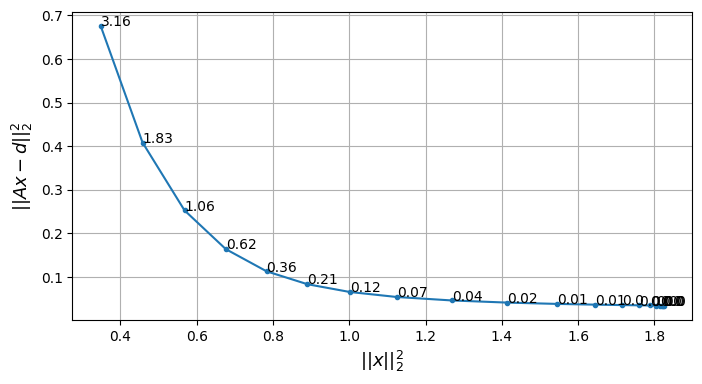

In [19]:
my_lambda=np.logspace(-4,0.5,20)
x=[]  #empty list for solution  norm
y=[]   #empty list for residual norm
for i in my_lambda:
    x_sol,itr=grad_des_reg(A,dnew,xo,i,500)
    x.append((np.linalg.norm(x_sol))**2) #calculating norm of solution 
    y.append((np.linalg.norm(dnew-np.dot(A,x_sol)))**2)#calculating norm of residual  
plt.figure(figsize=(8, 4))
# plt.title('L curve gradient descent')
plt.xlabel(r"$||x||_2^2$",fontsize=13)
plt.ylabel(r"$||Ax-d||_2^2$",fontsize=13)
plt.grid(True) 
plt.plot(x,y,".-")
for i in range(len(x)):
    plt.text(x[i],y[i],""+str(np.round(my_lambda[i],2)),fontsize=10)
# saving the L curve     
directory = '../results/noisy_data'
figure_path = os.path.join(directory,'L_curve.png')
plt.savefig(figure_path)
plt.show()    

# apply band pass filter and Q factor 

In [20]:
from band_pass import *
from Q_factor import *

In [21]:
r_true=r
r_true=r_true.reshape(500,1)
r_true=bp_filter(r_true,0.004,1, 3, 55, 65)
my_lambda=np.logspace(-3,0.5,20)
for i in my_lambda: 
    x_sol_noise_reg, final_iter=grad_des_reg(A,dnew,xo,i,500)
    r_sol=x_sol_noise_reg
    r_sol=r_sol.reshape(500,1)
    r_sol=bp_filter(r_sol,0.004,1,3 , 55, 65)
    Q=quality_factor(r_sol,r_true)
    print(np.round(Q,4),"for lambda="+str(i))

4.2463 for lambda=0.001
4.2712 for lambda=0.0015283067326587688
4.3088 for lambda=0.002335721469090121
4.365 for lambda=0.0035696988468260625
4.4482 for lambda=0.00545559478116852
4.5692 for lambda=0.008337822234717891
4.741 for lambda=0.012742749857031334
4.9766 for lambda=0.01947483039908756
5.2842 for lambda=0.029763514416313176
5.6609 for lambda=0.04548777947003775
6.0895 for lambda=0.06951927961775606
6.5166 for lambda=0.10624678308940409
6.8845 for lambda=0.1623776739188721
7.1237 for lambda=0.24816289228368238
7.1717 for lambda=0.37926901907322497
6.9979 for lambda=0.5796393953384967
6.6164 for lambda=0.8858667904100823
6.0762 for lambda=1.3538761800225432
5.4345 for lambda=2.069138081114788
4.7354 for lambda=3.1622776601683795


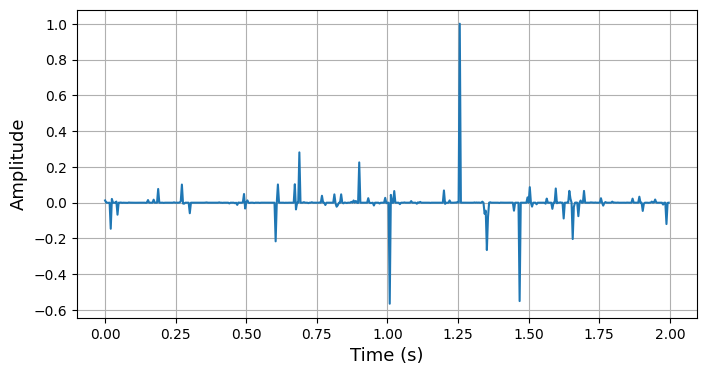

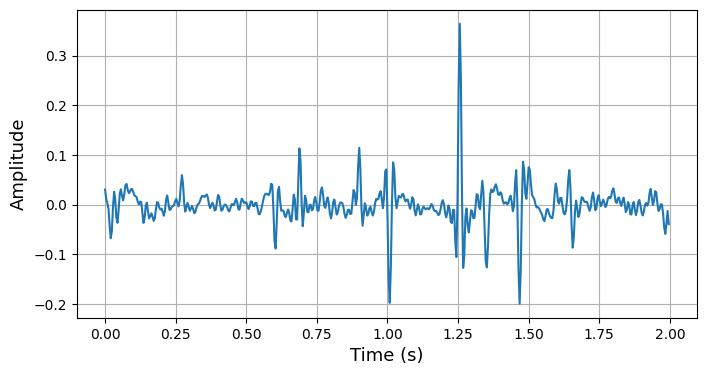

In [31]:
x_sol_noise_reg, final_iter_noise_reg=grad_des_reg(A,dnew,xo,0.38,500)
plt.figure(figsize=(8, 4))
plt.plot(time,r)
# plt.title('True refelectivity series')
plt.xlabel('Time (s)',fontsize = 13)
plt.ylabel('Amplitude',fontsize=13)
plt.grid(True)
plt.figure(figsize=(8, 4))
plt.plot(time,x_sol_noise_reg)
# plt.title('Recovered refelectivity series regilarized gradient descent')
plt.xlabel('Time (s)',fontsize = 13)
plt.ylabel('Amplitude',fontsize=13)
plt.grid(True)
directory = '../results/noisy_data'
figure_path = os.path.join(directory,'grad_des_noisy_reg.png')
plt.savefig(figure_path)
plt.show() 

#  same problem by conjucate gradient

In [23]:
from conj_grad import *
from conj_grad_reg import *

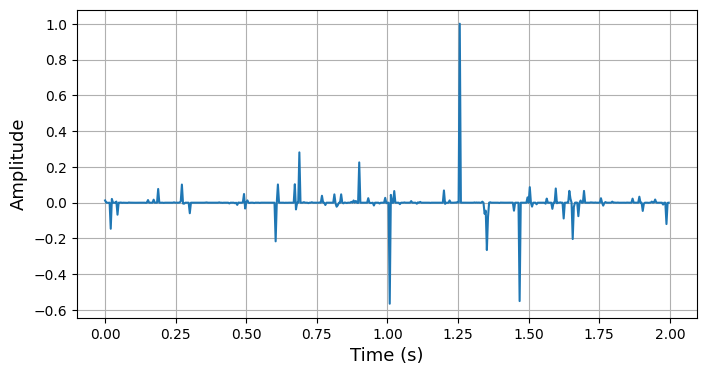

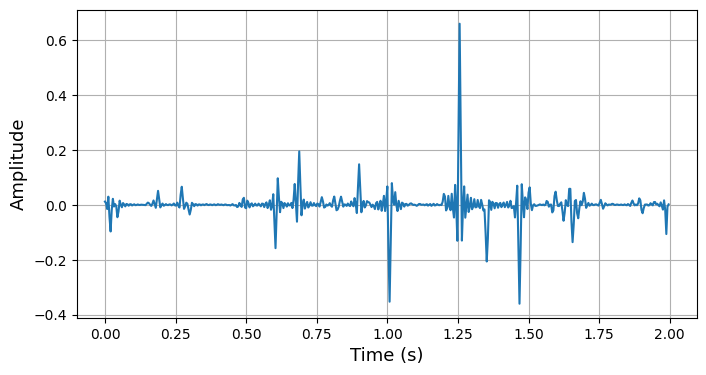

In [24]:
x_sol_cg, final_iter_cg=conj_grad(A, d, xo, 500,tol=0.000001)
plt.figure(figsize=(8, 4))
plt.plot(time,r)
# plt.title('True refelectivity series')
plt.xlabel('Time (s)',fontsize = 13)
plt.ylabel('Amplitude',fontsize=13)
plt.grid(True)
plt.figure(figsize=(8, 4))
plt.plot(time,x_sol_cg)
# plt.title('Recovered refelectivity series')
plt.xlabel('Time (s)',fontsize = 13)
plt.ylabel('Amplitude',fontsize=13)
plt.grid(True)
directory = '../results/data'
figure_path = os.path.join(directory,'conj_grad.png')
plt.savefig(figure_path)

# solution of noisy data by conjugate gradient

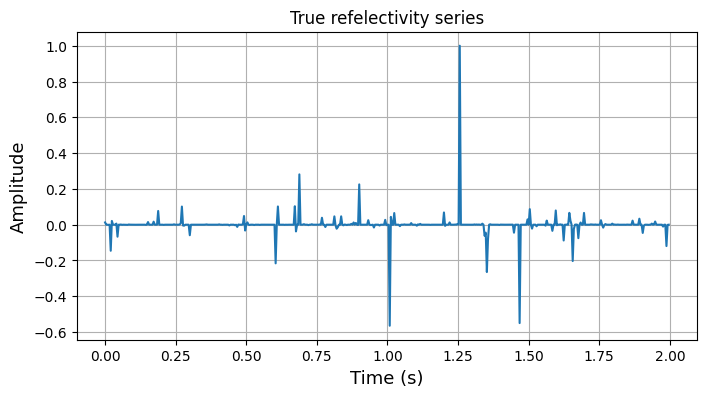

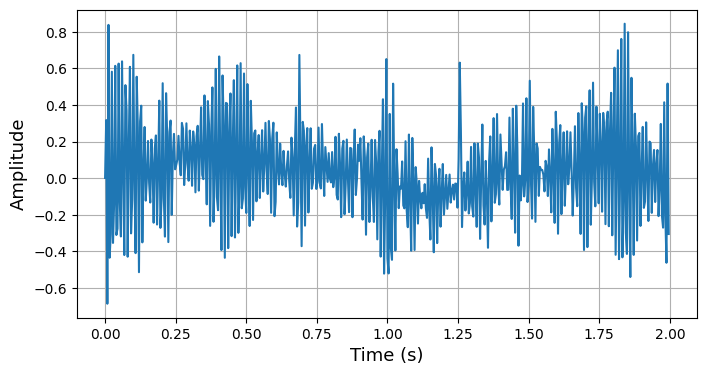

In [25]:
x_sol_cg_noise, final_iter_cg_noise=conj_grad(A, dnew, xo, 500,tol=0.000001)
plt.figure(figsize=(8, 4))
plt.plot(time,r)
plt.title('True refelectivity series')
plt.xlabel('Time (s)',fontsize = 13)
plt.ylabel('Amplitude',fontsize=13)
plt.grid(True)
plt.figure(figsize=(8, 4))
plt.plot(time,x_sol_cg_noise)
# plt.title('Recovered refelectivity series for conjucate gradient with lambda zero')
plt.xlabel('Time (s)',fontsize = 13)
plt.ylabel('Amplitude',fontsize=13)
plt.grid(True)
directory = '../results/noisy_data'
figure_path= os.path.join(directory, 'conj_grad_noisy.png')
plt.savefig(figure_path)

# lambda by l2 norm 

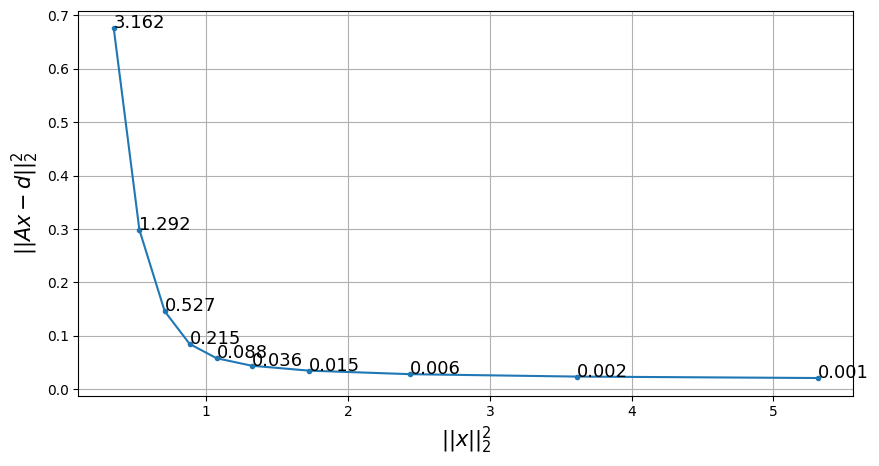

In [26]:
my_lambda=np.logspace(-3,0.5,10)
x=[]
y=[]
for i in my_lambda:
    x_sol_cg_noise_reg,itr=conj_grad_reg(A,dnew,xo,i,500,tol=0.000001)
    x.append((np.linalg.norm(x_sol_cg_noise_reg))**2) #calculating norm of solution 
    y.append((np.linalg.norm(dnew-np.dot(A,x_sol_cg_noise_reg)))**2) #calculating norm of residual 
plt.figure(figsize=(10, 5))
plt.plot(x,y,".-")
# plt.title('L curve conjucate gradient')
plt.xlabel(r"$||x||_2^2$",fontsize=15)
plt.ylabel(r"$||Ax-d||_2^2$",fontsize=15)
plt.grid(True)   
for i in range(len(x)):
    plt.text(x[i],y[i],""+str(np.round(my_lambda[i],3)),fontsize=13)
directory = '../results/noisy_data'
figure_path = os.path.join(directory,'L_curve_cg.png')
plt.savefig(figure_path)
plt.show()     

# apply band pass filter and Q factor 

In [27]:
r_true=r
r_true=r_true.reshape(500,1)
r_true=bp_filter(r_true,0.004,1, 3, 55, 65)
for i in my_lambda: 
    x_sol_cg_noise_reg,itr=conj_grad_reg(A,dnew,xo,i,500,tol=0.000001)
    r_sol=x_sol_cg_noise_reg
    r_sol=r_sol.reshape(500,1)
    r_sol=bp_filter(r_sol,0.004,1, 3, 55, 65)
    Q=quality_factor(r_sol,r_true)
    print(np.round(Q,4),"for lambda="+str(i))

3.9895 for lambda=0.001
4.0964 for lambda=0.002448436746822227
4.3191 for lambda=0.005994842503189409
4.7409 for lambda=0.014677992676220698
5.4299 for lambda=0.03593813663804628
6.3222 for lambda=0.0879922543569107
7.0583 for lambda=0.21544346900318845
7.0573 for lambda=0.527499706370262
6.1447 for lambda=1.291549665014884
4.7354 for lambda=3.1622776601683795


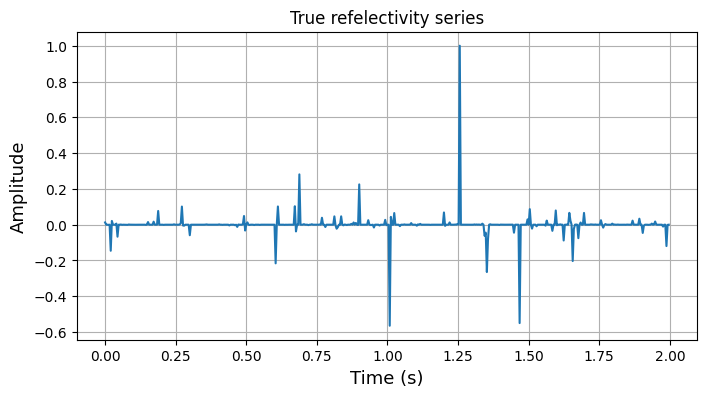

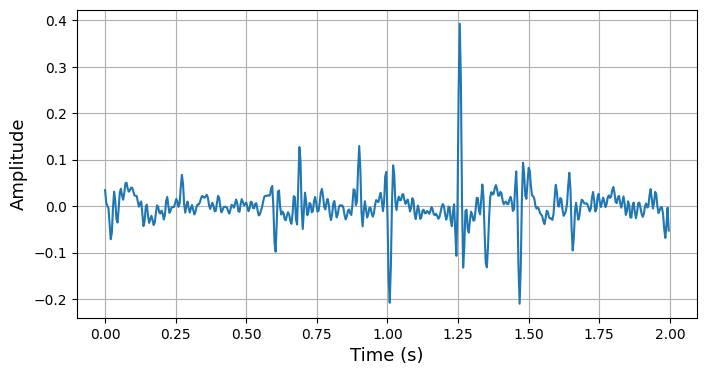

In [30]:
x_sol_cg_noise, final_iter_cg_noise=conj_grad_reg(A, dnew,xo,0.215443,500,tol=0.000001)
plt.figure(figsize=(8, 4))
plt.plot(time,r)
plt.title('True refelectivity series')
plt.xlabel('Time (s)',fontsize = 13)
plt.ylabel('Amplitude',fontsize=13)
plt.grid(True)
plt.figure(figsize=(8, 4))
plt.plot(time,x_sol_cg_noise)
# plt.title('Recovered refelectivity series for conjucate gradient noisy')
plt.xlabel('Time (s)',fontsize = 13)
plt.ylabel('Amplitude',fontsize=13)
plt.grid(True)
directory = '../results/noisy_data'
figure_path = os.path.join(directory,'conj_noisy_reg.png')
plt.savefig(figure_path)

##  Hybrid 𝓁1∕𝓁2 norm  

In [29]:
from hybrid import *

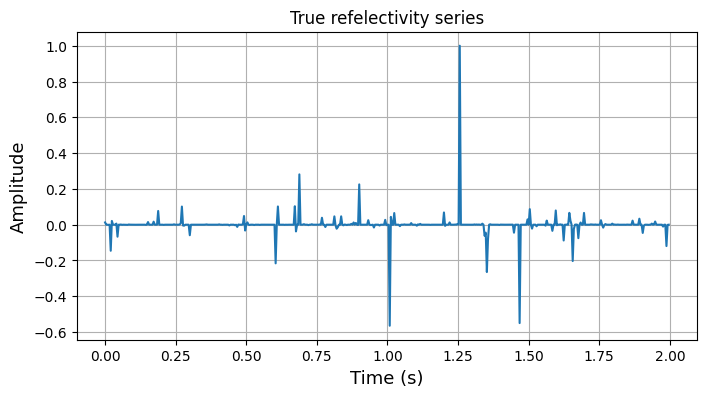

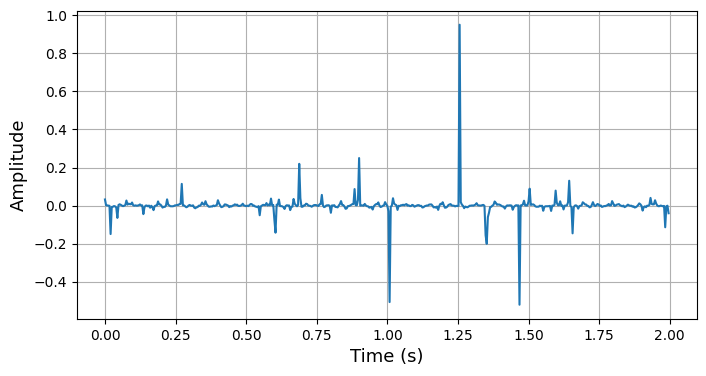

In [30]:
x_sol_reg_new,final_iter=hybrid(A,dnew,xo,0.054,5000,0.000001)
plt.figure(figsize=(8, 4))
plt.plot(time,r)
plt.title('True refelectivity series')
plt.xlabel('Time (s)',fontsize = 13)
plt.ylabel('Amplitude',fontsize=13)
plt.grid(True)
plt.show()
plt.figure(figsize=(8, 4))
plt.plot(time,x_sol_reg_new)
# plt.title('Recovered refelectivity series')
plt.xlabel('Time (s)',fontsize = 13)
plt.ylabel('Amplitude',fontsize=13)
plt.grid(True)
directory = '../results/noisy_data'
figure_path = os.path.join(directory,'hybrid.png')
plt.savefig(figure_path)

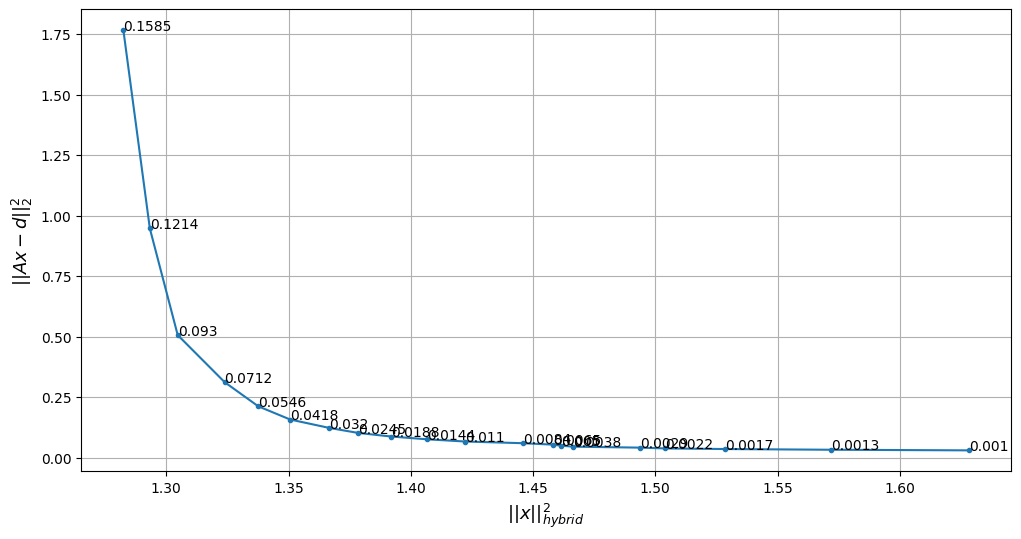

In [38]:
my_lambda=np.logspace(-3,-0.8,20)
# empty list for solution and residual norm
x=[]
y=[]
for i in my_lambda:
    e=0.000001    #epsilon
    x_sol_reg_new,final_iter=hybrid(A,dnew,xo,i,5000,0.000001)
    x.append((np.linalg.norm(np.sqrt(x_sol_reg_new**2+e**2))-e))#norm ofsolution 
    y.append((np.linalg.norm(dnew-np.dot(A,x_sol_reg_new)))**2)#norm of residual 
plt.figure(figsize=(12, 6))
plt.plot(x,y,".-")
# plt.title('L curve hybrid norm')
plt.xlabel(r"$||x||_{hybrid}^2$",fontsize=13)
plt.ylabel(r"$||Ax-d||_2^2$",fontsize=13)
plt.grid(True)   
for i in range(len(x)):
    plt.text(x[i],y[i],""+str(np.round(my_lambda[i],4)),fontsize=10)
directory = '../results/noisy_data'
figure_path = os.path.join(directory,'L_curve_hybrid.png')
plt.savefig(figure_path)
plt.show()     

# apply band pass filter and Q factor 

In [39]:
r_true=r
r_true=r_true.reshape(500,1)
r_true=bp_filter(r_true,0.004,1, 3, 55, 65)
for i in my_lambda: 
    x_sol_reg_new,final_iter=hybrid(A,dnew,xo,i,5000,0.000001)
    r_sol= x_sol_reg_new
    r_sol=r_sol.reshape(500,1)
    r_sol=bp_filter(r_sol,0.004,1, 3, 55, 65)
    Q=quality_factor(r_sol,r_true)
    print(np.round(Q,4),"for lambda="+str(i))

4.4905 for lambda=0.001
4.7197 for lambda=0.00130553786902303
4.9998 for lambda=0.0017044291274531946
5.3605 for lambda=0.0022251967709560286
5.7997 for lambda=0.002905078650510861
6.2355 for lambda=0.00379269019073225
6.6922 for lambda=0.004951500669473132
7.2207 for lambda=0.0064643716324900655
7.8937 for lambda=0.008439481965654007
8.6629 for lambda=0.011018063301098226
9.5 for lambda=0.01438449888287663
10.3147 for lambda=0.018779508018514923
11.0668 for lambda=0.02451735887979288
11.9752 for lambda=0.032008340465997674
12.683 for lambda=0.04178810060294223
13.1547 for lambda=0.054555947811685226
12.8625 for lambda=0.07122485584859918
12.2802 for lambda=0.09298674652605267
10.3229 for lambda=0.12139771890700753
8.2988 for lambda=0.15848931924611134


# huber norm of solution and l2 norm of residual 

In [40]:
from huber import *

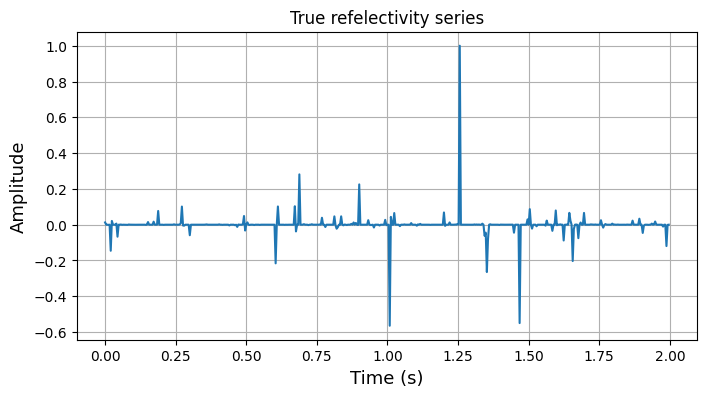

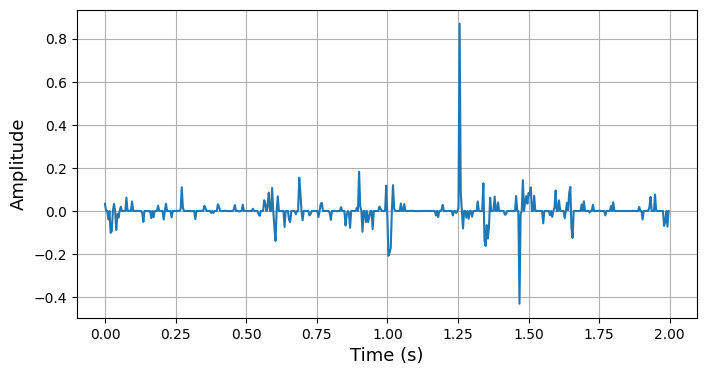

In [41]:
x_sol_huber_1,final_iter=huber(A,dnew,xo,0.15,501,0.001)
plt.figure(figsize=(8, 4))
plt.plot(time,r)
plt.title('True refelectivity series')
plt.xlabel('Time (s)',fontsize=13)
plt.ylabel('Amplitude',fontsize=13)
plt.grid(True)
plt.figure(figsize=(8, 4))
plt.plot(time,x_sol_huber_1)
# plt.title('Recovered refelectivity series')
plt.xlabel('Time (s)',fontsize=13)
plt.ylabel('Amplitude',fontsize=13)
plt.grid(True)
directory = '../results/noisy_data'
figure_path = os.path.join(directory,'huber.png')
plt.savefig(figure_path)

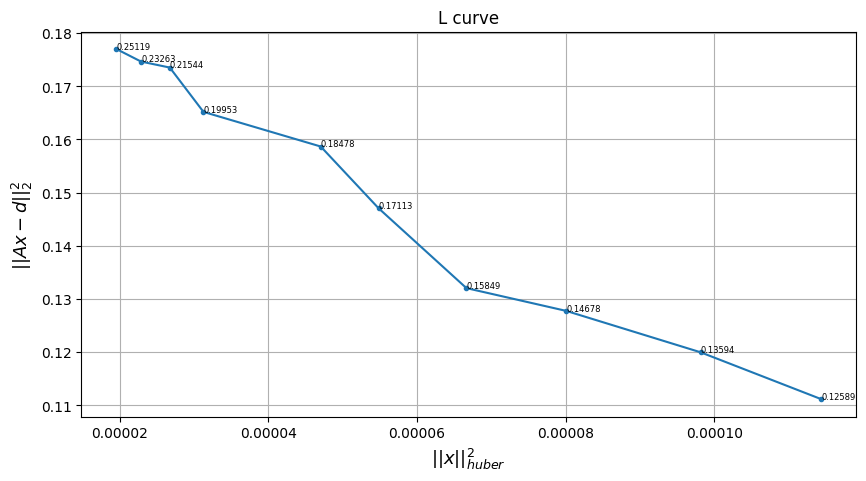

In [42]:
my_lambda=np.logspace(-0.9,-0.6,10)
x=[]
y=[]
for i in my_lambda:
    x_sol_huber_1,final_ite=huber(A,dnew,xo,i,501,0.001)
    for i in range(len(x_sol_huber_1)):
        epsilon=0.001
        x_sol_huber_term=np.zeros(len(x_sol_huber_1))
        if np.abs(x_sol_huber_1[i])<epsilon:
            x_sol_huber_term[i]=((x_sol_huber_1[i])**2)/(2*epsilon)
        else:
            x_sol_huber_term[i]=epsilon*np.abs(x_sol_huber_1[i])-(epsilon**2)/2
    x.append(np.linalg.norm(x_sol_huber_term))
    y.append((np.linalg.norm(np.dot(A,x_sol_huber_1)-dnew))**2)
plt.figure(figsize=(10,5))
plt.plot(x,y,".-")
plt.title('L curve')
plt.xlabel(r"$||x||_{huber}^2$",fontsize=13)
plt.ylabel(r"$||Ax-d||_2^2$",fontsize=13)
plt.grid(True)   
for i in range(len(x)):
    plt.text(x[i],y[i],""+str(np.round(my_lambda[i],5)),fontsize=6)
directory = '../results/noisy_data'
figure_path = os.path.join(directory,'L_curve_huber.png')
plt.savefig(figure_path)    

# cauchy norm

In [43]:
from cauchy import *

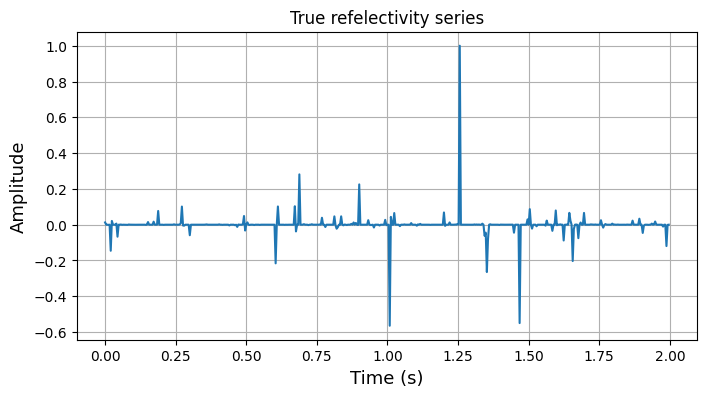

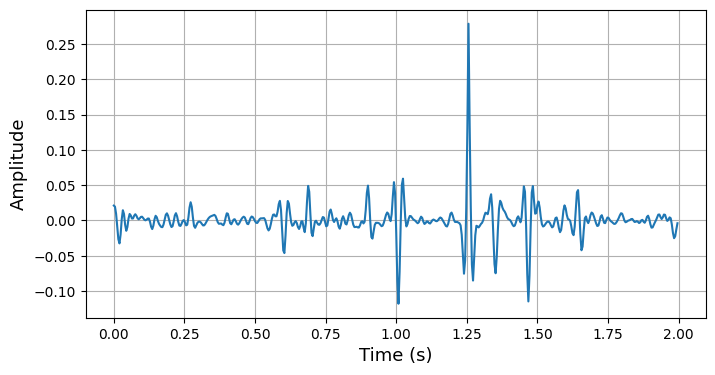

In [44]:

plt.figure(figsize=(8, 4))
plt.plot(time,r)
plt.title('True refelectivity series')
plt.xlabel('Time (s)',fontsize=13)
plt.ylabel('Amplitude',fontsize=13)
plt.grid(True)
x_sol_cauchy,itr=cauchy(A,dnew,xo,0.27,5000,0.1)
plt.figure(figsize=(8, 4))
plt.plot(time,x_sol_cauchy)
# plt.title('Recovered refelectivity series')
plt.xlabel('Time (s)',fontsize=13)
plt.ylabel('Amplitude',fontsize=13)
plt.grid(True)
directory = '../results/noisy_data'
figure_path = os.path.join(directory,'cauchy.png')
plt.savefig(figure_path)  

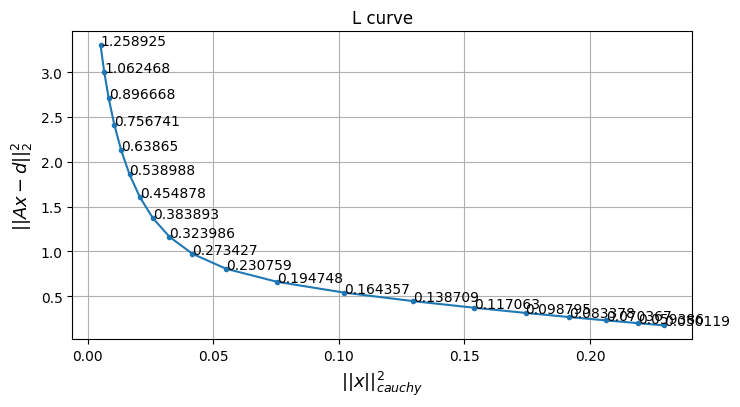

In [46]:
my_lambda=np.logspace(-1.3,0.1,20)
x=[]
y=[]
for i in my_lambda:
    x_sol_cauchy,itr=cauchy(A,dnew,xo,i,5000,0.1)
    x.append(np.linalg.norm(np.log(((x_sol_cauchy**2)/2)+1)))
    y.append((np.linalg.norm(np.dot(A,x_sol_cauchy)-dnew))**2)
plt.figure(figsize=(8, 4))
plt.plot(x,y,".-")
plt.title('L curve')
plt.xlabel(r"$||x||_{cauchy}^2$",fontsize=13)
plt.ylabel(r"$||Ax-d||_2^2$",fontsize=13)
plt.grid(True)   
for i in range(len(x)):
    plt.text(x[i],y[i],""+str(np.round(my_lambda[i],6)),fontsize=10)
directory = '../results/noisy_data'
figure_path = os.path.join(directory,'L_curve_cauchy.png')
plt.savefig(figure_path)    

# IRLS

In [47]:
from irls import  *

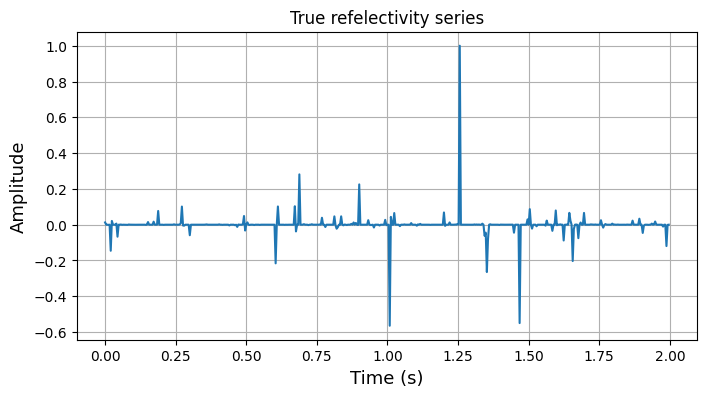

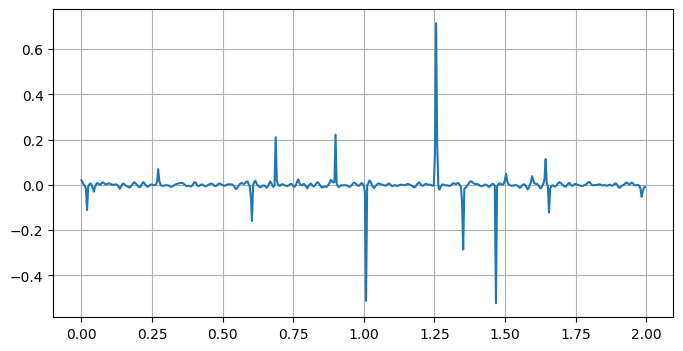

In [48]:
x_sol_irls,Q=irls(A,dnew,xo,0.0144,20,50)
plt.figure(figsize=(8, 4))
plt.plot(time,r)
plt.title('True refelectivity series')
plt.xlabel('Time (s)',fontsize=13)
plt.ylabel('Amplitude',fontsize=13)
plt.grid(True)
plt.show()
plt.figure(figsize=(8, 4))
plt.plot(time,x_sol_irls)
# plt.title('Recovered refelectivity series')
plt.grid(True)
directory = '../results/noisy_data'
figure_path = os.path.join(directory,'irls.png')
plt.savefig(figure_path)

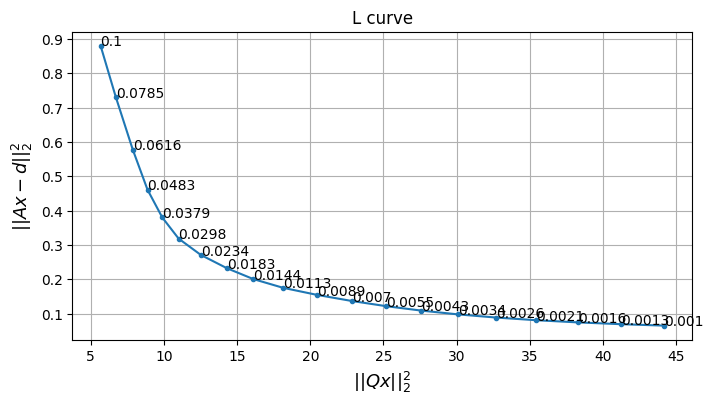

In [49]:
my_lambda=np.logspace(-3,-1,20)
xaxis=[]
yaxis=[]
for i in my_lambda:
    x_sol_irls,Q=irls(A,dnew,xo,i,20,50)
    xaxis.append((np.linalg.norm(Q*x_sol_irls))**2)
    yaxis.append((np.linalg.norm(np.dot(A,x_sol_irls)-dnew))**2)
plt.figure(figsize=(8, 4))
plt.plot(xaxis,yaxis,".-")
plt.title('L curve')
plt.xlabel(r"$||Qx||_{2}^2$",fontsize=13)
plt.ylabel(r"$||Ax-d||_2^2$",fontsize=13)
plt.grid(True) 
for i in range(len(xaxis)):
    plt.text(xaxis[i],yaxis[i],""+str(np.round(my_lambda[i],4)),fontsize=10)
directory = '../results/noisy_data'
figure_path = os.path.join(directory,'L_curve_irls.png')
plt.savefig(figure_path)

# FISTA

In [38]:
from fista import  *
from power_method import  *

In [51]:
x0=np.random.normal(0,1,r.shape)
alpha=power_method(x0,A , num_iter=15)

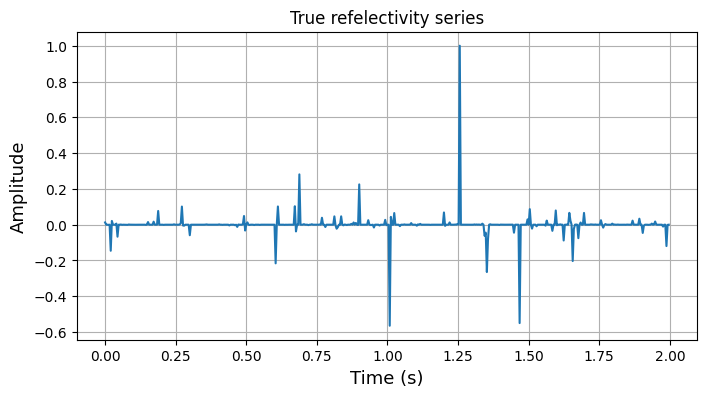

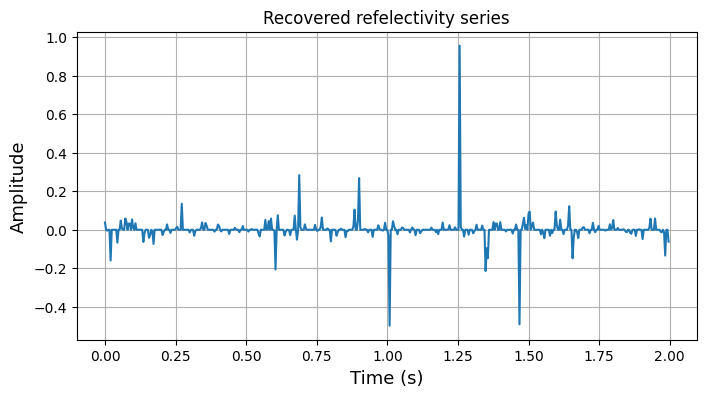

In [52]:
x_sol_fista,J=fista(dnew, A, 0.021, alpha, 500)
plt.figure(figsize=(8, 4))
plt.plot(time,r)
plt.title('True refelectivity series')
plt.xlabel('Time (s)',fontsize=13)
plt.ylabel('Amplitude',fontsize=13)
plt.grid(True)
plt.figure(figsize=(8, 4))
plt.plot(time,x_sol_fista)
plt.title('Recovered refelectivity series')
plt.xlabel('Time (s)',fontsize=13)
plt.ylabel('Amplitude',fontsize=13)
plt.grid(True)
directory = '../results/noisy_data'
figure_path = os.path.join(directory,'fista.png')
plt.savefig(figure_path)

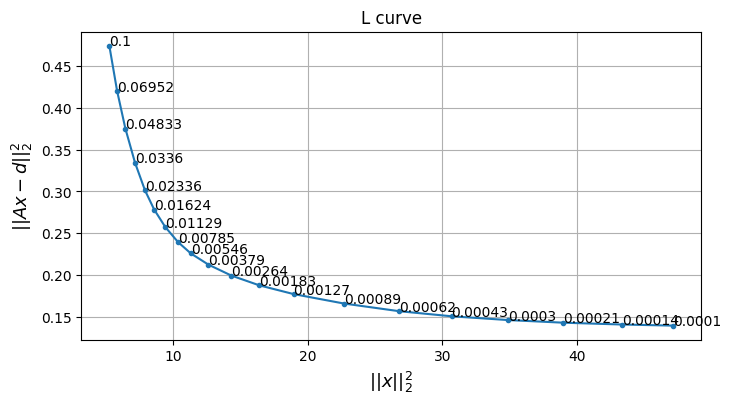

In [53]:
my_lambda=np.logspace(-4,-1,20)
x=[]
y=[]
for i in my_lambda:
    x_sol_fista,J=fista(dnew, A, i, alpha, 500)
    x.append(np.linalg.norm(np.sum(np.abs(x_sol_fista))))
    y.append((np.linalg.norm(np.dot(A,x_sol_fista)-dnew)))
plt.figure(figsize=(8, 4))
plt.plot(x,y,".-")
plt.title('L curve')
plt.xlabel(r"$||x||_{2}^2$",fontsize=13)
plt.ylabel(r"$||Ax-d||_2^2$",fontsize=13)
plt.grid(True)   
for i in range(len(x)):
    plt.text(x[i],y[i],""+str(np.round(my_lambda[i],5)),fontsize=10)
# saving the L curve     
directory = '../results/noisy_data'
figure_path = os.path.join(directory,'Lcurve_fista.png')
plt.savefig(figure_path)
plt.show()        

In [54]:
from band_pass import *
from Q_factor import *

In [55]:
r_true=r
r_true=r_true.reshape(500,1)
r_true=bp_filter(r_true,0.004,1, 3, 55, 65)
my_lambda=np.logspace(-4,-1,20)
for i in my_lambda: 
    x_sol_fista,J=fista(dnew, A, i, alpha, 500)
    r_sol=x_sol_fista
    r_sol=r_sol.reshape(500,1)
    r_sol=bp_filter(r_sol,0.004,1,3 , 55, 65)
    Q=quality_factor(r_sol,r_true)
    print(np.round(Q,4),"for lambda="+str(i))

3.9268 for lambda=0.0001
3.9431 for lambda=0.0001438449888287663
3.9566 for lambda=0.00020691380811147902
4.0003 for lambda=0.00029763514416313193
4.0843 for lambda=0.00042813323987193956
4.2074 for lambda=0.0006158482110660267
4.3571 for lambda=0.0008858667904100823
4.6666 for lambda=0.0012742749857031334
5.0594 for lambda=0.0018329807108324356
5.631 for lambda=0.0026366508987303583
6.2328 for lambda=0.00379269019073225
6.8835 for lambda=0.005455594781168515
7.6962 for lambda=0.007847599703514606
8.741 for lambda=0.011288378916846883
9.8802 for lambda=0.01623776739188721
10.8944 for lambda=0.023357214690901212
12.1422 for lambda=0.03359818286283781
13.0973 for lambda=0.04832930238571752
13.6606 for lambda=0.06951927961775606
14.0375 for lambda=0.1


# Real data  example

1101

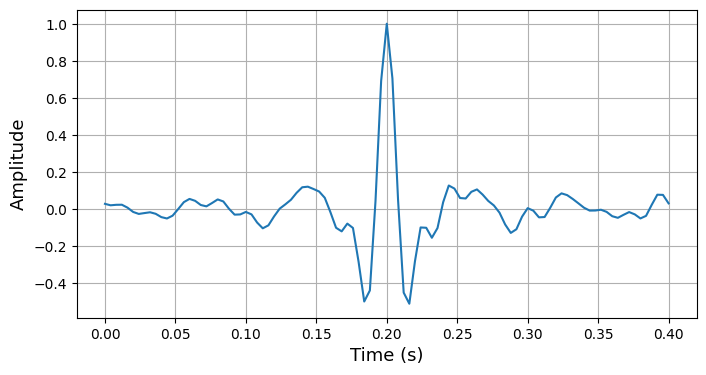

In [33]:
import seisplot
directory = '../data'
filename = os.path.join(directory, 'teapot_2d_05_LD.mat')
d= loadmat(filename)
data= d['Data']
w=d['w']
w=w.reshape((101,))
time_wav=np.arange(0, 0.004 * len(w), 0.004)
plt.figure(figsize=(8, 4))
plt.plot(time_wav,w)
plt.grid(True)
plt.xlabel('Time (s)',fontsize=13)
plt.ylabel('Amplitude',fontsize=13)
p=data.shape[0]
# print(max(data))
l_d=data.shape[0]
l_d

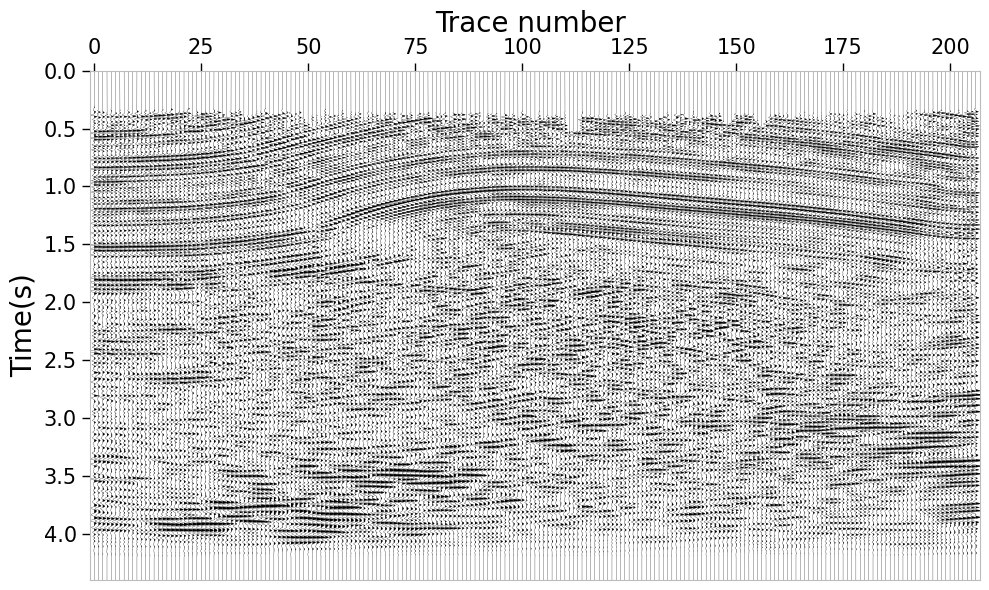

In [34]:
fig,ax = seisplot.plot(data.T, plottype="wiggle", width=10,
                       height=6,perc=99,wigglehires=1,vaxis=np.arange(0, 0.004 * data.shape[0],0.004),
                       hlabel="Trace number ",vlabel="Time(s)",labelfontsize=20,ticktop=True,ticklabelsize=15);
# plt.ylabel("time(s) ",fontsize=13)
# plt.xlabel("Trace number ",fontsize=13)
# ax.xaxis.set_ticks_position('top')  
# ax.xaxis.set_label_position('top')
# plt.title("test data")
directory = '../results/noisy_data'
figure_path = os.path.join(directory,'real_data.png')
plt.savefig(figure_path)

In [39]:
import numpy as np
def toepn(p,wo):
    """
    input
    p=length of data vector
    wo= initial wavelet vector
    output
    A=toeplitz matrix of  sorce wavelet
    """
    q=len(wo)
    col=np.hstack((wo,np.zeros(p-q)))  #first column and first row of toeplitz matr
    row=np.hstack((wo[0],np.zeros(p-1)))
    from scipy.linalg import toeplitz
    A=toeplitz(col,row)
    return(A)
A=toepn(l_d,w)
A.shape

(1101, 1101)

In [40]:
dim=A.shape[1]
x0=np.zeros(dim)
xo=np.random.normal(0,1,(dim,1))
alpha=power_method(xo, A, num_iter=15)
my_lambda=0.01
xo.shape

(1101, 1)

In [41]:
xfinal=np.zeros((dim,207))
d=np.zeros_like(data)


In [42]:
for i in range(207):
    d=data[:,i]
    x_sol,itr=conj_grad_reg(A, d, x0,my_lambda,500,tol=0.001)
    xfinal[:,i]=x_sol
sol_cong=xfinal.T 

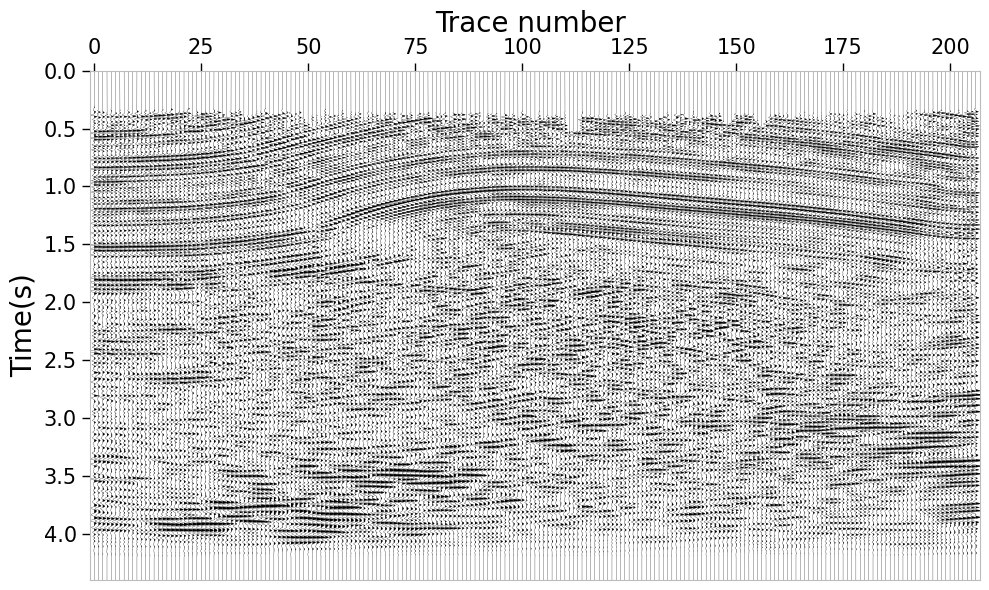

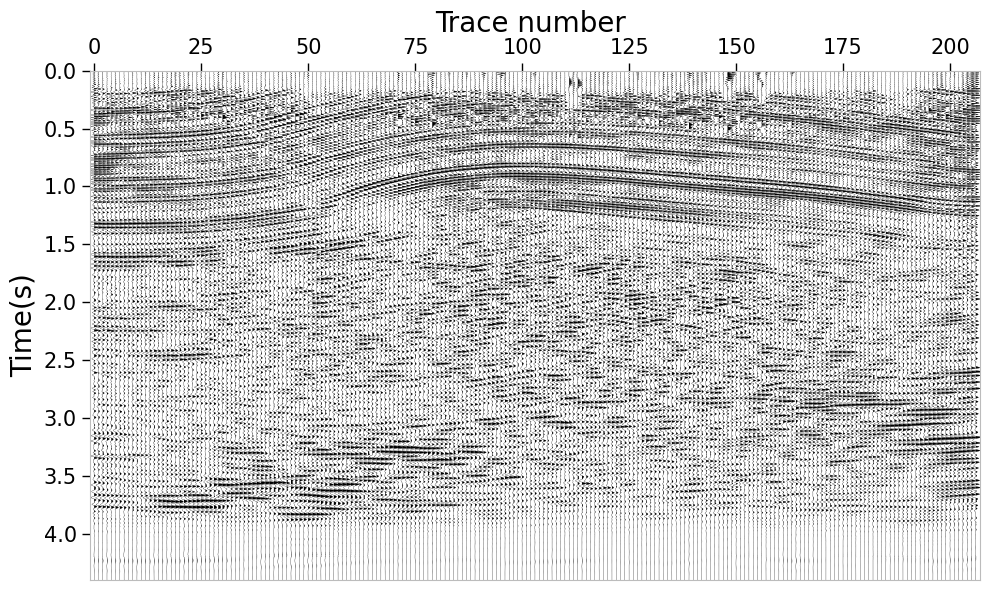

In [43]:
fig,ax = seisplot.plot(data.T, plottype="wiggle", width=10,
                       height=6,perc=99,wigglehires=1,vaxis=np.arange(0, 0.004 * data.shape[0], 0.004),
                       hlabel="Trace number ",vlabel="Time(s)",labelfontsize=20,ticktop=True,ticklabelsize=15);
plt.xlabel("Trace number ")
# plt.title("test data")
fig,ax = seisplot.plot(sol_cong,plottype="wiggle", width=10, height=6, perc=99, wigglehires=1,vaxis=np.arange(0, 0.004 * sol_cong.shape[1], 0.004),
                       hlabel="Trace number ",vlabel="Time(s)",labelfontsize=20,ticktop=True,ticklabelsize=15);

# plt.title("Deconvolution by Conjugate gradient")
directory = '../results/noisy_data'
figure_path = os.path.join(directory,'real_data_conjgrad.png')
plt.savefig(figure_path)

In [44]:
for i in range(207):
    d=data[:,i]
    x_sol,itr=fista(d, A, my_lambda, alpha, 500)
    xfinal[:,i]=x_sol
sol_fista=xfinal.T 

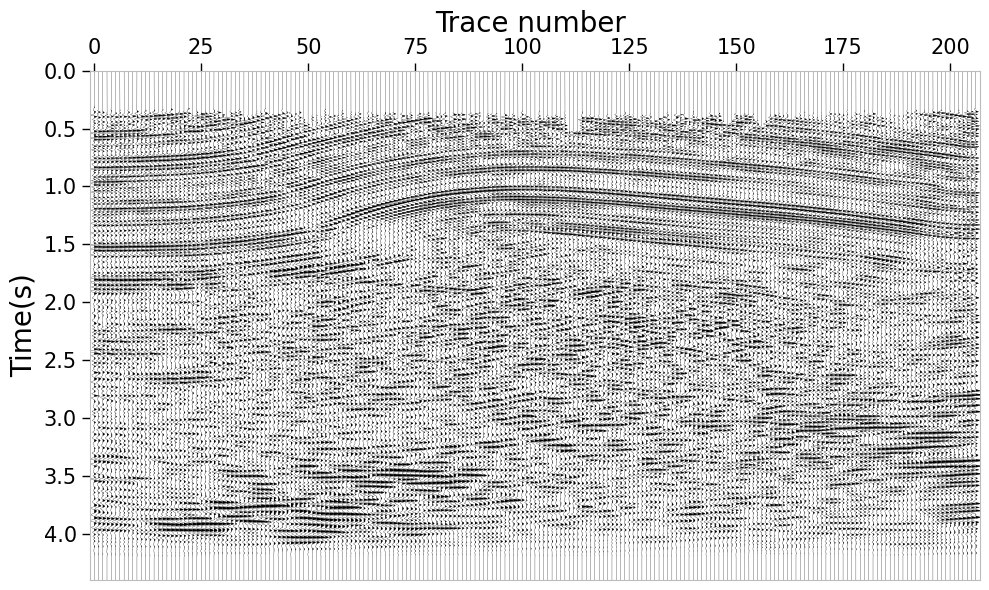

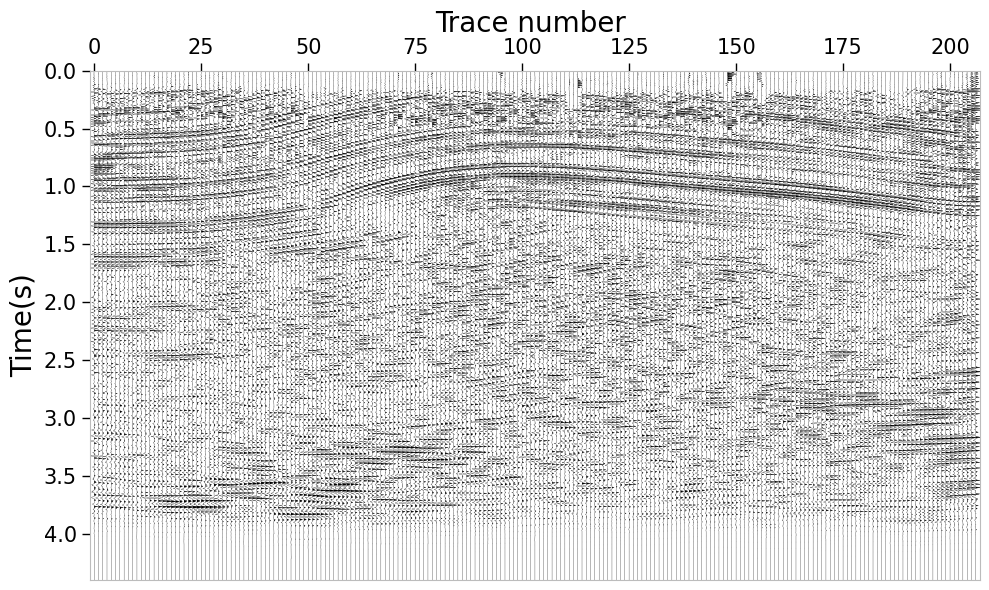

In [45]:
fig,ax = seisplot.plot(data.T, plottype="wiggle", width=10, height=6,perc=99,wigglehires=1,vaxis=np.arange(0, 0.004 * data.shape[0], 0.004),
                       hlabel="Trace number ",vlabel="Time(s)",labelfontsize=20,ticktop=True,ticklabelsize=15);

# plt.title("test data")
fig,ax = seisplot.plot(sol_fista, plottype="wiggle", width=10, height=6, perc=99,wigglehires=1,vaxis=np.arange(0, 0.004 * sol_fista.shape[1], 0.004),
                       hlabel="Trace number ",vlabel="Time(s)",labelfontsize=20,ticktop=True,ticklabelsize=15);

# plt.title("deconvolution by FISTA")
directory = '../results/noisy_data'
figure_path = os.path.join(directory,'real_data_FISTA.png')
plt.savefig(figure_path)

# blind deconvolution

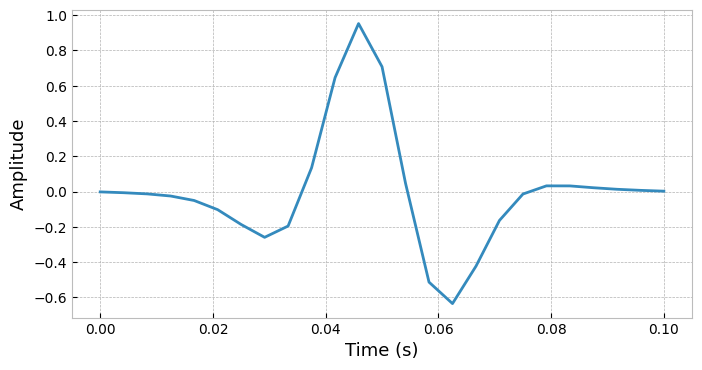

In [46]:
y,t = ricker_wavelet(25, 0.004, 0.1,np.pi/4)
directory = '..\data'
filename = os.path.join(directory, 'ricker_blind.mat')
savemat(filename, {'y': y})
# plotting the wavelet
plt.figure(figsize=(8, 4), facecolor='white')
plt.gca().set_facecolor('white')
plt.plot(t, y)
# plt.title('Ricker Wavelet')
plt.xlabel('Time (s)',fontsize=13)
plt.ylabel('Amplitude',fontsize=13)
plt.grid(True)
plt.show()

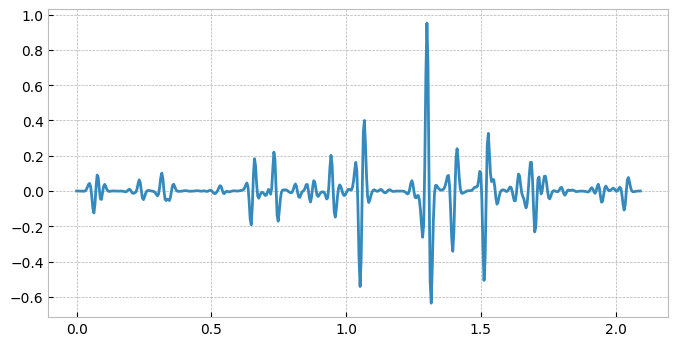

In [47]:
d,dnew=generate_data(y,r,4)
plt.figure(figsize=(8, 4), facecolor='white')
plt.gca().set_facecolor('white')
p=len(d)
plt.plot(dtime,d)
plt.grid(True)

In [48]:
wo,t=ricker_wavelet(25, dt, length,0)
q=len(wo)
xo=np.hstack((np.zeros(p-q+1)))
W=toep(p,wo)
W.shape
wo.shape

(25,)

In [49]:
def blind_decon(xo,d,l1,l2,it,ot):
    import numpy as np
    p=len(d)
    ro=xo
    wo,t=ricker_wavelet(25, dt, length,0)
    for i in range(5000):
        w1=wo
        W=toep(p,wo)
        ro,itr=conj_grad_reg(W, d, ro,l1,it,tol=0.000001)
        R=toep(p,ro)
        wo,itr=conj_grad_reg(R, d, wo,l2,ot,tol=0.00001)
        if np.linalg.norm(w1-wo)<0.000001:
            print(i)
            break
        else:
            continue
    return wo,ro 

In [50]:
wo,ro=blind_decon(xo,d,0.01,0.2,500,50)

<Figure size 640x480 with 0 Axes>

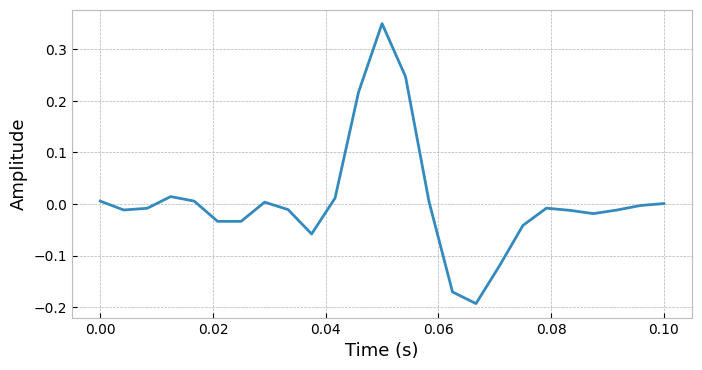

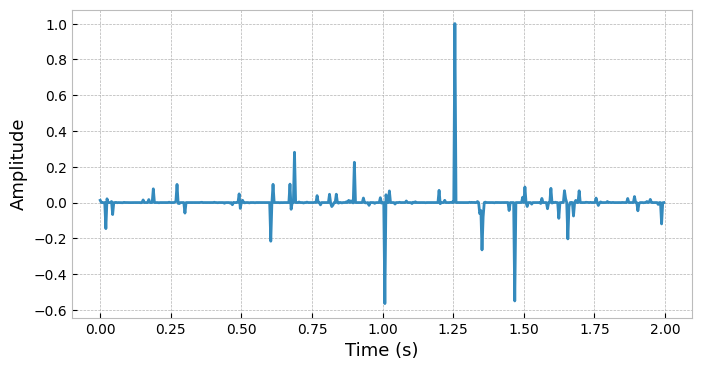

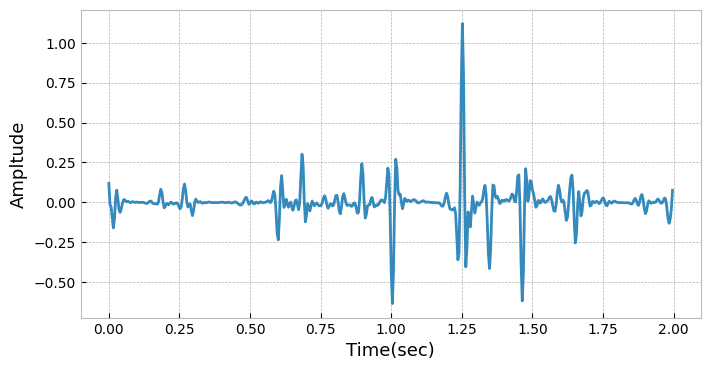

In [51]:
plt.figure(1)
plt.figure(figsize=(8, 4), facecolor='white')
plt.gca().set_facecolor('white')
plt.grid(True)
plt.plot(t,wo)
# plt.title("recovered wavelet")
plt.xlabel('Time (s)',fontsize = 13)
plt.ylabel('Amplitude',fontsize=13)
directory = '../results/data'
figure_path = os.path.join(directory,'wav_blind.png')
plt.savefig(figure_path)
plt.figure(2)
plt.figure(figsize=(8, 4), facecolor='white')
plt.gca().set_facecolor('white')
plt.grid(True)
plt.plot(time,r)
# plt.title('True refelectivity series')
plt.xlabel('Time (s)',fontsize = 13)
plt.ylabel('Amplitude',fontsize=13)
plt.figure(3)
plt.figure(figsize=(8, 4), facecolor='white')
plt.gca().set_facecolor('white')
plt.grid(True)
plt.plot(time,ro);
# plt.title("recovered reflectivity series by blind deconvolution")
plt.xlabel("Time(sec)",fontsize = 13)
plt.ylabel("Ampltude",fontsize = 13)
directory = '../results/data'
figure_path = os.path.join(directory,'reflect_blind.png')
plt.savefig(figure_path)